# Convolução no Processamento de Imagens

Este projeto visa utilizar a convolução em imagens para demonstrar diversas operações, usando bibliotecas como NumPy, SciPy e OpenCV.

## Descrição

A convolução é uma operação matemática essencial no processamento de imagens, usada para aplicar filtros, detectar bordas, suavizar imagens entre outros. Consiste em multiplicar uma matriz/kernel/máscara por cada pixel da imagem de entrada, assim gerando uma nova imagem. A convolução é amplamente utilizada em técnicas como detecção de bordas (filtros Sobel), realce de detalhes (filtro Laplaciano) e suavização (média ou Gaussiana).

## Código

- **Convolução**

  - **Manual**

    Recebe uma a imagem e o Kernel, a imagem é convertida em um array NumPy e, em seguida, expandida com np.pad para evitar problemas ao percorrer o kernel pela imagem, para cada pixel, é calculada a soma ponderada dos valores dos pixels vizinhos multiplicados pelos valores do kernel e a imagem resultante é uma nova matriz representando a imagem convoluída.

      ```python
      def convolucao(imagem, matriz):
        img = np.array(imagem)

        dif = (matriz.shape[0]-1) // 2

        img = np.pad(img, dif, mode='constant')

        res = img.copy()

        for x in range(dif, img.shape[0]-dif):
            for y in range(dif, img.shape[1]-dif):
                res[x, y] = np.sum(img[x-dif:x+dif+1, y-dif:y+dif+1] * matriz)

        return Image.fromarray(res[dif:img.shape[0]-dif, dif:img.shape[1]-dif])
      ```

  - **Bibliotecas**

    ```python
    def convolucaoSciPy(imagem, matriz):
      img = np.array(imagem)
      return scipy.signal.convolve2d(img, matriz, mode='same')

    def convolucaoOpenCV(imagem, matriz):
        img = np.array(imagem)
        return cv2.filter2D(img, -1, matriz)
    ```

- **Kernel/Matriz**

  - **Média**

    Quando utilizado na convolução esse kernel aplica um efeito de suavização (blur), calculando a média dos pixels ao redor de cada pixel na imagem.
    A matriz é preenchida com valores iguais a:

    ```math
     \frac{1}{size^2}
    ```

    Assim garantindo que a soma total dos elementos seja 1. Isso preserva o brilho geral da imagem.

    ```python
    def matrizMedia(size):
      if((size % 2) == 0):
          size += 1
      if(size < 3):
          size = 3
      return np.full((size, size), 1/(size*size))
    ```

  - **Gaussiana**

    Quando utilizado na convolução esse kernel suaviza, porém dá pesos maiores aos pixels mais próximos do centro, reduzindo o impacto de pixels distantes.

    ```math
    G(x, y) = e^{-\frac{(x - \text{center})^2 + (y - \text{center})^2}{2\sigma^2}}
    ```
    **σ** controla o desvio padrão, definindo quão "larga" será a suavização.

    ```python
    def matrizGaussiana(size, sigma): 
      if((size % 2) == 0):
          size += 1
      if(size < 3):
          size = 3
      matriz = np.zeros((size, size))
      for x in range(size):
          for y in range(size):
              matriz[x, y] = np.exp(-((x - size//2)**2 + (y - size//2)**2) / (2*sigma**2))
      return matriz / np.sum(matriz)
    ```

  - **Laplaciano**

    Quando utilizado na convolução o kernel Laplaciano é usado para detecção de bordas, é baseado na segunda derivada, calculando mudanças bruscas na intensidade, onde o centro da matriz é negativo e os vizinhos diretos contribuem positivamente.

    ```python
    def matrizLaplaciana(size):
      if((size % 2) == 0):
          size += 1
      if(size < 3):
          size = 3
      matriz = np.zeros((size, size))
      matriz[size//2, size//2] = -4
      matriz[size//2-1, size//2] = 1
      matriz[size//2+1, size//2] = 1
      matriz[size//2, size//2-1] = 1
      matriz[size//2, size//2+1] = 1
      return matriz
    ```

  - **Sobel X e Y**  
    
    Quando utilizado na convolução é para detectar gradientes horizontais 𝑆𝑜𝑏𝑒𝑙𝑋 e verticais 𝑆𝑜𝑏𝑒𝑙𝑌.

    ```python
    def matrizSobelX():
      return np.array([[-1, -2, -1],
                       [0,   0,  0],
                       [1,   2,  1]])

    def matrizSobelY():
        return np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    ```
  
  - **Gradiente**
  
    Quando utilizado na convolução o kernel gradiente calcula a magnitude os resultados dos filtros SobelX e SobelY.

    O gradiente é obtido por:

    ```math
    G = \sqrt{(G_x^2 + G_y^2)}
    ```

    ```python
    def gradiente(imagem):
      sobelX = matrizSobelX()
      sobelY = matrizSobelY()

      gradienteX = convolucaoOpenCV(imagem, sobelX)
      gradienteY = convolucaoOpenCV(imagem, sobelY)
      gradienteX = np.array(gradienteX)
      gradienteY = np.array(gradienteY)

      gradiente = np.sqrt(np.power(gradienteX, 2) + np.power(gradienteY, 2))

      return gradiente
    ```

  - **Soma Laplaciano**

    Esse consiste em aplicar o kernel Laplaciano e entáo somar o resultado a imagem original, assim destaca os contornos enquanto mantem parte das informações originais da imagem.

    ```python
    def laplacianoSum(imagem):
      laplaciano = matrizLaplaciana(3)
      laplaciano = convolucao(imagem, laplaciano)
      sum = np.array(imagem) + np.array(laplaciano)
      return Image.fromarray(sum)
    ```

### Código final

Escolha a imagem: 
1 - biel
2 - cameraman
3 - lena


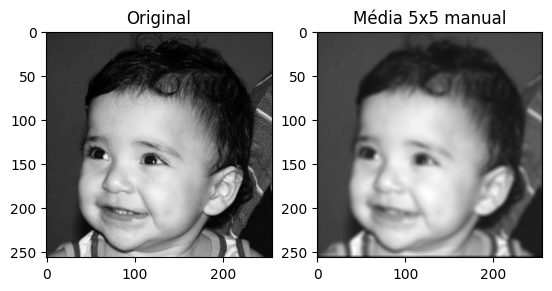

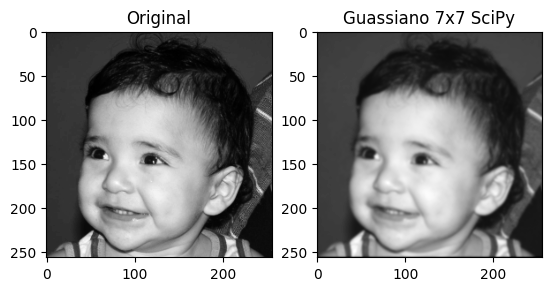

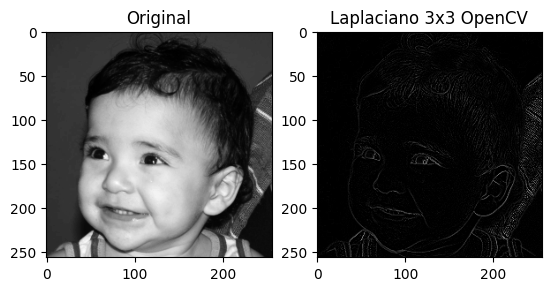

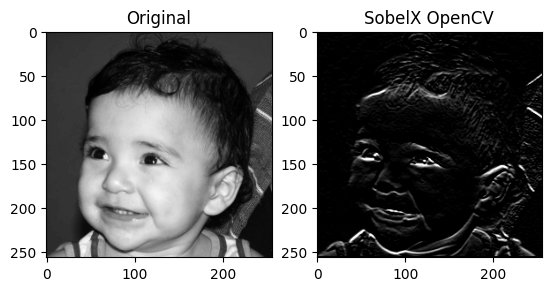

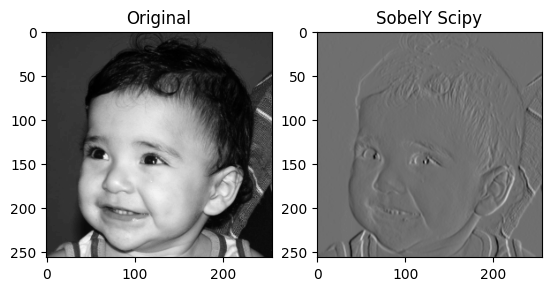

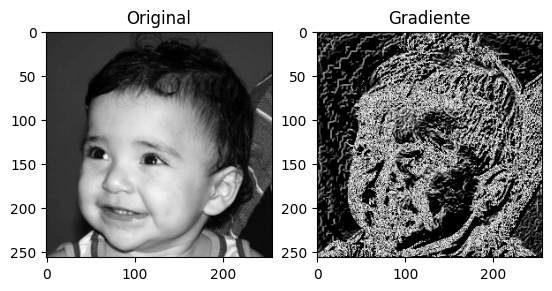

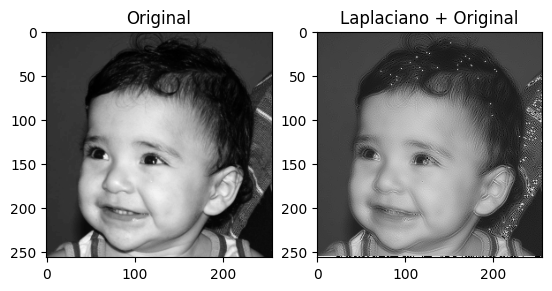

In [5]:
import datetime
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

def plot(img, edit, txt1, txt2):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt2)
    plt.show()

def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def convolucao(imagem, matriz):
    img = np.array(imagem)

    dif = (matriz.shape[0]-1) // 2

    img = np.pad(img, dif, mode='constant')

    res = img.copy()

    for x in range(dif, img.shape[0]-dif):
        for y in range(dif, img.shape[1]-dif):
            res[x, y] = np.sum(img[x-dif:x+dif+1, y-dif:y+dif+1] * matriz)

    return Image.fromarray(res[dif:img.shape[0]-dif, dif:img.shape[1]-dif])

def convolucaoSciPy(imagem, matriz):
    img = np.array(imagem)
    return scipy.signal.convolve2d(img, matriz, mode='same')

def convolucaoOpenCV(imagem, matriz):
    img = np.array(imagem)
    return cv2.filter2D(img, -1, matriz)

def matrizMedia(size):
    if((size % 2) == 0):
        size += 1
    if(size < 3):
        size = 3
    return np.full((size, size), 1/(size*size))

def matrizGaussiana(size, sigma): 
    if((size % 2) == 0):
        size += 1
    if(size < 3):
        size = 3
    matriz = np.zeros((size, size))
    for x in range(size):
        for y in range(size):
            matriz[x, y] = np.exp(-((x - size//2)**2 + (y - size//2)**2) / (2*sigma**2))
    return matriz / np.sum(matriz)


def matrizLaplaciana(size):
    if((size % 2) == 0):
        size += 1
    if(size < 3):
        size = 3
    matriz = np.zeros((size, size))
    matriz[size//2, size//2] = -4
    matriz[size//2-1, size//2] = 1
    matriz[size//2+1, size//2] = 1
    matriz[size//2, size//2-1] = 1
    matriz[size//2, size//2+1] = 1
    return matriz

def matrizSobelX():
    return np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

def matrizSobelY():
    return np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

def gradiente(imagem):
    sobelX = matrizSobelX()
    sobelY = matrizSobelY()

    gradienteX = convolucaoOpenCV(imagem, sobelX)
    gradienteY = convolucaoOpenCV(imagem, sobelY)
    gradienteX = np.array(gradienteX)
    gradienteY = np.array(gradienteY)

    gradiente = np.sqrt(np.power(gradienteX, 2) + np.power(gradienteY, 2))

    return gradiente

def laplacianoSum(imagem):
    laplaciano = matrizLaplaciana(3)
    laplaciano = convolucao(imagem, laplaciano)
    sum = np.array(imagem) + np.array(laplaciano)
    return Image.fromarray(sum)

def main():
    biel = Image.open('imgs/biel.png')
    cameraman = Image.open('imgs/cameraman.tif')
    lena = Image.open('imgs/lena_gray_512.tif')
    imagem = None

    print("Escolha a imagem: ")
    print("1 - biel")
    print("2 - cameraman")
    print("3 - lena")
    entrada = input()
    
    match entrada:
        case "1":
            imagem = biel

        case "2":
            imagem = cameraman

        case "3":
            imagem = lena

        case _:
            print("Opção inválida")
            exit()

    
    plot(imagem, convolucao(imagem, matrizMedia(5)), "Original", "Média 5x5 manual")
    plot(imagem, convolucaoSciPy(imagem, matrizGaussiana(7, 1)), "Original", "Guassiano 7x7 SciPy")
    plot(imagem, convolucaoOpenCV(imagem, matrizLaplaciana(3)), "Original", "Laplaciano 3x3 OpenCV")
    plot(imagem, convolucaoOpenCV(imagem, matrizSobelX()), "Original", "SobelX OpenCV")
    plot(imagem, convolucaoSciPy(imagem, matrizSobelY()), "Original", "SobelY Scipy")
    plot(imagem, gradiente(imagem), "Original", "Gradiente")
    plot(imagem, laplacianoSum(imagem), "Original", "Laplaciano + Original")
    
if __name__ == "__main__":
    main()
